In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Homework 0:

This homework serves as a brief introduction/refresher to batching operations using `numpy`, along with a bit of visualization practice using `matplotlib`.

We will release our solution file for reference!


## Q1: Generate Arrays

Fill in the following functions that generate arrays of data using several types of routines.

Check out [numpy array creation routines](https://numpy.org/devdocs/reference/routines.array-creation.html) and [random sampling](https://numpy.org/devdocs/reference/random/index.html) when implementing to find relevant functions for generating data.

- `generate_zeros` - generate an array of data of shape (10, 35, 3) full of zeros.
- `generate_between` - generate 50 numbers evenly spaced between two provided floats $a$ and $b$ (including a and b).
- `generate_random` - generate a random array of integers between 1 and 8 of shape (2, 10)


In [2]:
def generate_zeros():
    return np.zeros((10, 35, 3))

zeros = generate_zeros() 
print("Generate Zeros Correct? ", np.all(zeros == 0) and zeros.shape == (10, 35, 3))

def generate_between(a, b):
    return np.linspace(a, b, 50)

gen_betw = generate_between(0, 10)
print("Generate Between correct? ", gen_betw[0] == 0 and gen_betw[-1] == 10 and np.allclose(gen_betw[1:] - gen_betw[:-1], (10.0 / 49)))

def generate_random():
    return np.random.random_sample((2, 10)) * 7 + 1
    
rand = generate_random()
print("Generate random correct? ", np.all(rand >= 1) and np.all(rand <= 8) and rand.shape == (2, 10))

Generate Zeros Correct?  True
Generate Between correct?  True
Generate random correct?  True


## Q2: Copy Array Values

Using your `generate_random` function from Q1, generate an array of (2, 10) data. Then implement the following functions.

- `copy_along_last_dim` - given the random data, copy along last dim 3 times, so the resulting array is (2, 30) where the sequence of random numbers is repeated.
- `copy_along_first_dim` - given the random data, copy along the first dimension 4 times, so the resulting array is (8, 10). This time instead of copying the sequence, copy it along the first dim so the first item is copied 4 times, then the next item is copied 4 times.

Hint: Check out functions for [tiling arrays](https://numpy.org/devdocs/reference/routines.array-manipulation.html#tiling-arrays).


In [3]:
def copy_along_last_dim(rand_data):
    return np.tile(rand_data, (1, 3))

rand_data = generate_random()
last_dim_rand = copy_along_last_dim(rand_data)

print("Copy along last correct? ", last_dim_rand.shape == (2, 30) and np.all(np.split(last_dim_rand, 3, axis=1) == rand_data))

def copy_along_first_dim(rand_data):
    return np.repeat(rand_data, 4, axis=0)
first_dim_rand = copy_along_first_dim(rand_data)

print("Copy along first correct? ", first_dim_rand.shape == (8, 10) and np.allclose(rand_data[0], first_dim_rand[:4]) and np.allclose(rand_data[1], first_dim_rand[4:]))

Copy along last correct?  True
Copy along first correct?  True


## Q3: Batch retrival

Given a batch of images of shape (B, H, W, 3), retrieve the colors of specific locations for each image, based on an array of pixel indices `loc` of shape (B, 2).
Tutorial on slicing and indexing in numpy: https://numpy.org/doc/stable/user/basics.indexing.html


In [4]:

def get_colors_at_locations_non_batch(images, loc):
    B, H, W, C = images.shape
    colors = np.zeros((B, C), dtype=images.dtype)

    for i in range(B):
        y, x = loc[i]
        colors[i] = images[i, y, x]

    return colors

def get_colors_at_locations_batch(images, loc):
    return images[np.arange(loc.shape[0]), loc[:, 0], loc[:, 1]]


# Example usage
images = np.random.randint(0, 256, (5, 100, 100, 3), dtype=np.uint8)
loc = np.array([[10, 10], [20, 20], [30, 30], [40, 40], [50, 50]])

colors = get_colors_at_locations_non_batch(images, loc)
colors_batch = get_colors_at_locations_batch(images, loc)
print("Correct? ", np.linalg.norm(colors - colors_batch)< 1e-5)

Correct?  True


## Q4: Pairwise Distance Matrix

Given a batch of points:
points = np.random.rand(50, 3),
Compute the pairwise Euclidean distances between all points.
Tutorial on broadcasting: https://numpy.org/doc/stable/user/basics.broadcasting.html


In [5]:
#### Loop-Based Function
def pairwise_distance_non_batch(points):
    n = points.shape[0]
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distances[i, j] = np.linalg.norm(points[i] - points[j])
    return distances

#### Vectorized Function
def pairwise_distance_batch(points):
    # None adds a new axis making it (50, 3) -> (50, 1, 3)
    # when subtracting (50, 1, 3) - (50, 3), np broadcasts by starting from the last axis
    # - last axis is the same so no problem
    # - second to last axis is different so np broadcasts by copying the array 50 times along that axis
    # - final, leftmost axis doesnt exist so it is assumed to be 1, and np broadcasts by copying the array 50 times along that axis
    # this way each original point has a copy of all the other points in an array and each point is subtracted from each other point
    return np.linalg.norm(points[:, None] - points, axis=2)

points = np.random.rand(500, 3)
dis_mat_loop = pairwise_distance_non_batch(points)
dis_mat_batch = pairwise_distance_batch(points)
print("Correct? ", np.linalg.norm(dis_mat_loop - dis_mat_batch) < 1e-5)

Correct?  True


## Q5 Masked vector operation

Given a 2D array of shape (B, D), compute the sum of positive values for each row.
Tutorial on slicing and indexing in numpy: https://numpy.org/doc/stable/user/basics.indexing.html


In [6]:
#### Loop-Based Function
def positive_sum_non_batch(data):
    results = []
    for row in data:
        row_sum = 0
        for element in row:
            if element > 0:
                row_sum += element
        results.append(row_sum)
    return np.array(results)

#### Vectorized Function
def positive_sum_batch(data):
    data[data < 0] = 0
    return np.sum(data, axis=1)

data = np.random.randn(100, 100)
result_loop = positive_sum_non_batch(data)
result_batch = positive_sum_batch(data)
print("Correct? ", np.linalg.norm(result_loop - result_batch) < 1e-5)

Correct?  True


## Q6: Batch cosine similarity

Given two batches of vectors of the same shape, compute the cosine similarity for each pair of vectors. The cosine similarity between two vectors $a$ and $b$ is defined as:
$$\text{cosine similarity} = \frac{a \cdot b}{\|a\| \|b\|}$$

You may compute the norm of a vector (i.e. $\|v\|$) using [np.linalg.norm](https://numpy.org/doc/2.1/reference/generated/numpy.linalg.norm.html) and the dot product (i.e., $v \cdot w$) using [np.dot](https://numpy.org/doc/2.1/reference/generated/numpy.dot.html).


In [7]:
#### Loop-Based Function
def cosine_similarity_non_batch(batch_a, batch_b):
    results = []
    for a, b in zip(batch_a, batch_b):
        numerator = np.dot(a, b)
        denominator = np.linalg.norm(a) * np.linalg.norm(b)
        results.append(numerator / denominator)
    return np.array(results)

def cosine_similarity_batch(batch_a, batch_b):
    numerator = np.diag(np.dot(batch_a, batch_b.T)) # diagonal contains dot product of each row of a with each row of b
    denominator = np.linalg.norm(batch_a, axis=1) * np.linalg.norm(batch_b, axis=1)
    return numerator / denominator
    pass

batch_a = np.random.randn(500, 100)
batch_b = np.random.randn(500, 100)
result_loop = cosine_similarity_non_batch(batch_a, batch_b)
result_batch = cosine_similarity_batch(batch_a, batch_b)
print("Correct? ", np.linalg.norm(result_loop - result_batch) < 1e-5)

Correct?  True


## Q7: Compute joint torques

Given a batch of force vectors $F\in \mathbb{R}^{6}$ applied to an end effector and the corresponding Jacobian matrices $J\in \mathbb{R}^{6\times 7}$, compute the joint torques for each force: $\tau = J^T F$. Each force vector in the batch should be combined with the (transpose) of the corresponding Jacobian in the batch of matrices.

Hint: You may find np.einsum helpful for this task(https://labex.io/tutorials/python-numpy-einsum-for-scientific-computing-4991).


In [8]:

#### Loop-Based Function
def compute_joint_torques_non_batch(forces, jacobians):
    torques = []
    for i in range(len(forces)):
        torques.append(jacobians[i].T @ forces[i])
    return np.array(torques)

def compute_joint_torques_batch(forces, jacobians):
    n = forces.shape[0] # number of data points in the batch
    f = forces.shape[1] # number of elements in a force vector
    j = jacobians.shape[1] # number of columns in the Jacobian matrix

    return np.einsum('nf,nfj->nj', forces, jacobians) # this is freaking magic


forces = np.random.randn(100, 6)
jacobians = np.random.randn(100, 6, 7)
result_loop = compute_joint_torques_non_batch(forces, jacobians)
result_batch = compute_joint_torques_batch(forces, jacobians)
print("Correct? ", np.linalg.norm(result_loop - result_batch) < 1e-5)

Correct?  True


## Q8: Transform Points (2D)


Given the 2D points of a pentagon and a single 3x3 transformation matrix in SE(2) (i.e., a planar rotation and translation), transform the vertices of the pentagon using the transformation matrix. If you are unfamiliar with homogenous transformation matrices, just treat it as a matrix multiplication!

To properly apply the transformation matrix, we need to:

- convert the 2D points to _homogeneous coordinates_ by appending a 1 to each point in our batch, so each point has 3 dimensions.
- apply the 3x3 transformation to each point (in batch!).
- convert the resulting 3D points back to 2D by simply dropping the last dimension.

Here, we will be given the following transformation matrix, which corresponds to a rotation in the plane by 45 degrees and a translation by (1, 1):


In [9]:
transform = np.array([
    [np.cos(np.pi/4), -np.sin(np.pi/4), 1],
    [np.sin(np.pi/4), np.cos(np.pi/4), 1],
    [0, 0, 1]
])

Here are the starting vertices of the pentagon:


In [10]:
pentagon = np.array([
    [0, 0],
    [0.5, 0],
    [0.7, 0.5],
    [0.25, 0.7],
    [-0.2, 0.5],
    [0, 0]
])

Implement the following function to complete the function as described:


In [11]:
#### Loop-Based Function
def transform_points_non_batch(points, transform):
    transformed_points = []
    for point in points:
        point = np.append(point, 1)
        transformed_point = transform @ point
        transformed_points.append(transformed_point[:2])
    return np.array(transformed_points)

def transform_points_batch(points, transform):
    # Add a column of ones to the points then transpose so points are column vectors
    points = np.concatenate([points, np.ones((points.shape[0], 1))], axis=1).T 
    transformed_points = np.dot(transform, points).T # transpose back to get row vectors as in input
    return transformed_points[:, :2] # remove the last column of ones

tf_pentagon_non_batch = transform_points_non_batch(pentagon, transform)
tf_pentagon_batch = transform_points_batch(pentagon, transform)
print("Correct? ", np.linalg.norm(tf_pentagon_non_batch - tf_pentagon_batch) < 1e-5)

Correct?  True


Now implement the following function to use Matplotlib to visualize the original and transformed pentagons.


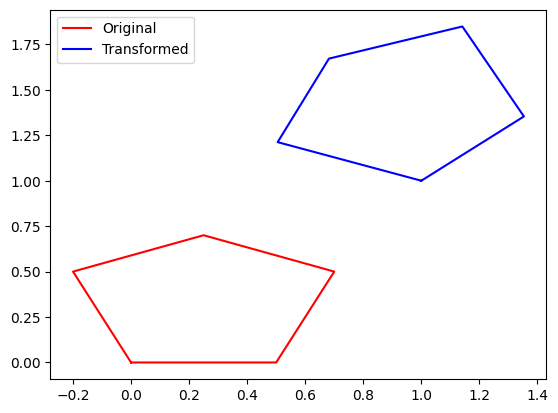

In [12]:
def visualize_pentagons(pentagon, tf_pentagon):
    plt.plot(pentagon[:, 0], pentagon[:, 1], 'r-', label='Original')
    plt.plot(tf_pentagon[:, 0], tf_pentagon[:, 1], 'b-', label='Transformed')
    plt.legend()
    plt.show()

visualize_pentagons(pentagon, tf_pentagon_batch)

## Q9: Generate Grid

Generate a 100x100 grid of points starting at (0, 0) in the bottom left and ending at (5, 5) in the top left.
For each point `p=(x,y)`, generate a color label based on the following rules:

- If `x < 1.5` set the color to green: RGB=[0, 1, 0].
- If `x > 1.5` and `y > 0.5`, generate the color to be: RGB=[(0.5 * sin(y) + 0.5), 0, (0.5 * cos(y) + 0.5)].
- Otherwise, set the color to red: RGB=[1, 0, 0].

Hint: You may find [np.linspace](https://numpy.org/doc/2.1/reference/generated/numpy.linspace.html), [np.meshgrid](https://numpy.org/doc/2.1/reference/generated/numpy.meshgrid.html), and functions on [joining arrays](https://numpy.org/doc/stable/reference/routines.array-manipulation.html#joining-arrays) helpful.


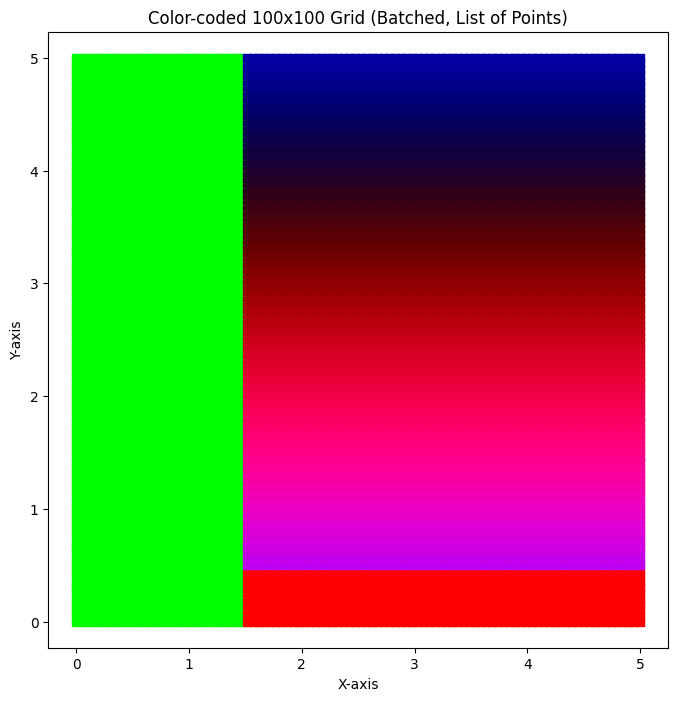

In [13]:
def generate_grid_batch():
    range = np.linspace(0, 5, 100)
    points_x, points_y = np.meshgrid(range, range)
    points = np.column_stack([points_x.flatten(), points_y.flatten()])

    colors = np.tile(np.array([1, 0, 0], dtype=float), (points.shape[0], 1)) # default to red
    green = points[:, 0] < 1.5 # points with x < 1.5
    colors[green] = [0, 1, 0] # green
    rgb_col = np.logical_and(points[:, 0] > 1.5, points[:, 1] > 0.5)
    colors[rgb_col] = np.array([0.5 * np.sin(points[rgb_col, 1]) + 0.5, np.zeros(np.sum(rgb_col)), 0.5 * np.cos(points[rgb_col, 1]) + 0.5]).T
    return points, colors

points, colors = generate_grid_batch()

# Plotting using plt.matshow
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], c=colors, marker='s')
plt.title("Color-coded 100x100 Grid (Batched, List of Points)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis('equal')
plt.grid(False)
plt.show()

## Q10: Normalizing Data

Often in robotics learning problems (and learning more generally), we _normalize_ our data before applying a learning algorithm, for example, transforming raw sensor data to lie between 0 and 1.

You are tasked with combining sensor data from multiple sources, each with different characteristics. Afterward, you need to normalize the combined dataset to have a zero mean and unit variance, i.e., to transform the data into a standard normal distribution.

Each "dataset" $i$ will be an array of shape $D_i \times 5$. Combine the datasets (provided as a list of arrays) into a single array of shape $D\times 5$ where $D=\sum_i D_i$. Then normalize along each of the 5 dimensions so that the data is roughly zero mean gaussian with unit variance.

Hint: Explore the statistics functions available in numpy: https://numpy.org/devdocs/reference/routines.statistics.html


In [14]:
def normalize_sensor_data_batch(data_list):
    data = np.vstack(data_list)
    normalized_data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    return normalized_data

data1 = np.random.normal(loc=5, scale=2, size=(1000, 5))
data2 = np.random.normal(loc=0, scale=1, size=(12, 5))
data3 = np.random.normal(loc=-3, scale=0.5, size=(130, 5))

normalized_data = normalize_sensor_data_batch([data1, data2, data3])

# Verify the normalization
print("Means of normalized data (should be close to 0):", np.mean(normalized_data, axis=0))
print("Standard deviations of normalized data (should be close to 1):", np.std(normalized_data, axis=0))

Means of normalized data (should be close to 0): [-5.19141064e-16  1.69391646e-15 -2.89707935e-16  1.42092992e-15
 -2.55254078e-15]
Standard deviations of normalized data (should be close to 1): [1. 1. 1. 1. 1.]
